## Data Load

In [2]:
import pandas as pd

In [3]:
features, stores, train = pd.read_csv('../data/features.csv'), pd.read_csv('../data/stores.csv'), pd.read_csv('../data/train.csv')

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train = train.set_index(['Store', 'Date', 'IsHoliday'])
features = features.set_index(['Store', 'Date', 'IsHoliday'])

In [8]:
train.head()

Dept  Weekly_Sales
Store Date       IsHoliday                    
1     2010-02-05 False         1      24924.50
      2010-02-12 True          1      46039.49
      2010-02-19 False         1      41595.55
      2010-02-26 False         1      19403.54
      2010-03-05 False         1      21827.90

In [9]:
features.head()

Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store Date       IsHoliday                                                  
1     2010-02-05 False            42.31       2.572        NaN        NaN   
      2010-02-12 True             38.51       2.548        NaN        NaN   
      2010-02-19 False            39.93       2.514        NaN        NaN   
      2010-02-26 False            46.63       2.561        NaN        NaN   
      2010-03-05 False            46.50       2.625        NaN        NaN   

                            MarkDown3  MarkDown4  MarkDown5         CPI  \
Store Date       IsHoliday                                                
1     2010-02-05 False            NaN        NaN        NaN  211.096358   
      2010-02-12 True             NaN        NaN        NaN  211.242170   
      2010-02-19 False            NaN        NaN        NaN  211.289143   
      2010-02-26 False            NaN        NaN        NaN  211.319643   
      2010-03-05 False            NaN        NaN        NaN  211.350143   

                            Unemployment  
Store Date       IsHoliday                
1     2010-02-05 False             8.106  
      2010-02-12 True              8.106  
      2010-02-19 False             8.106  
      2010-02-26 False             8.106  
      2010-03-05 False             8.106

In [10]:
def add_date_to_columns(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Week'] = (df.index.isocalendar().week % 4) + 1
    return df

def merge_df_on_date(df1, df2):
    return df1.join(df2)


def merge_df_on_store(df1, df2):
    return df1.merge(df2, on='Store')

In [11]:
train = merge_df_on_date(train, features).reset_index()
train = add_date_to_columns(train)

In [12]:
train = merge_df_on_store(train, stores)

In [13]:
train = train.fillna(0)

In [14]:
train.head()

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Week,Type,Size
0,1,False,1,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,2,A,151315
1,1,True,1,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2,2010,3,A,151315
2,1,False,1,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2,2010,4,A,151315
3,1,False,1,19403.54,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2,2010,1,A,151315
4,1,False,1,21827.90,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,3,2010,2,A,151315


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   IsHoliday     421570 non-null  bool   
 2   Dept          421570 non-null  int64  
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Month         421570 non-null  int32  
 14  Year          421570 non-null  int32  
 15  Week          421570 non-null  UInt32 
 16  Type          421570 non-null  object 
 17  Size          421570 non-null  int64  
dtypes: U

In [16]:
train.values

array([[1, False, 1, ..., 2, 'A', 151315],
       [1, True, 1, ..., 3, 'A', 151315],
       [1, False, 1, ..., 4, 'A', 151315],
       ...,
       [45, False, 98, ..., 2, 'B', 118221],
       [45, False, 98, ..., 3, 'B', 118221],
       [45, False, 98, ..., 4, 'B', 118221]], dtype=object)

## Scaling and Normalization

In [28]:
X, y = train.drop(columns=['Weekly_Sales']), train['Weekly_Sales'].values

In [29]:
X

,Store,IsHoliday,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Week,Type,Size
0,1,False,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2,2010,2,A,151315
1,1,True,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,2,2010,3,A,151315
2,1,False,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,2,2010,4,A,151315
3,1,False,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,2,2010,1,A,151315
4,1,False,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,3,2010,2,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,False,98,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,9,2012,4,B,118221
421566,45,False,98,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,10,2012,1,B,118221
421567,45,False,98,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,10,2012,2,B,118221
421568,45,False,98,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,10,2012,3,B,118221


In [30]:
y

array([24924.5 , 46039.49, 41595.55, ...,  1061.02,   760.01,  1076.8 ])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
cat_column = "Type"
num_columns = train.drop(columns=['Weekly_Sales', 'Type']).columns

In [22]:
num_columns

Index(['Store', 'IsHoliday', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Month', 'Year', 'Week', 'Size'],
      dtype='object')

In [23]:
ct = ColumnTransformer(
    [('cat-preprocessor', OneHotEncoder(), ["Type"]),
     ('num-preprocessor', MinMaxScaler(), num_columns)],
)

In [24]:
X_scaled = ct.fit_transform(X)

In [36]:
X_scaled[0]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.34148728e-01, 5.01002004e-02,
       0.00000000e+00, 2.53623361e-03, 2.05421852e-04, 0.00000000e+00,
       0.00000000e+00, 8.40499764e-01, 4.05117884e-01, 9.09090909e-02,
       0.00000000e+00, 3.33333333e-01, 6.30267339e-01])

In [35]:
len(X_scaled[0])

19

## Model Training

In [33]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.pipeline import Pipeline

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cpu


In [54]:
import matplotlib.pyplot as plt

In [61]:
# Custom Dataset for DataLoader
class SalesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# PyTorch Model Definition
class SalesPredictor(nn.Module):
    def __init__(self, input_dim):
        super(SalesPredictor, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# PyTorch Model Wrapper for Scikit-Learn
class PyTorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, epochs=100, batch_size=32, learning_rate=0.001):
        self.input_dim = input_dim
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.device = device
        self.model = SalesPredictor(input_dim)
        self.model = self.model.to(self.device)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.train_losses = []
        self.val_losses = []
    
    def fit(self, X, y, X_val=None, y_val=None):
        train_dataset = SalesDataset(torch.tensor(X, dtype=torch.float32).to(self.device),
                                torch.tensor(y, dtype=torch.float32).reshape(-1,1).to(self.device))
        val_dataset = SalesDataset(torch.tensor(X_val, dtype=torch.float32).to(self.device), 
                                torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1).to(self.device))
        
        if X_val is not None and y_val is not None:
            self.train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
            self.val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)

        for epoch in range(self.epochs):
            self.model.train()
            batch_losses = []
            for X_batch, y_batch in self.train_loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)
                self.optimizer.zero_grad()
                y_pred = self.model(X_batch)
                loss = self.criterion(y_pred, y_batch)
                batch_losses.append(loss.item())
                loss.backward()
                self.optimizer.step()
            
            train_loss = np.mean(batch_losses)
            self.train_losses.append(train_loss)

            if X_val is not None and y_val is not None:
                val_loss = self.evaluate(self.val_loader)
                self.val_losses.append(val_loss)

            if epoch % 10 == 0 or epoch == self.epochs - 1:
                if X_val is not None and y_val is not None:
                    print(f'Epoch {epoch}/{self.epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
                else:
                    print(f'Epoch {epoch}/{self.epochs}, Train Loss: {train_loss:.4f}')

        return self

    def evaluate(self, loader):
        self.model.eval()
        val_losses = []
        with torch.no_grad():
            for X_batch, y_batch in loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)
                y_pred = self.model(X_batch)
                loss = self.criterion(y_pred, y_batch)
                val_losses.append(loss.item())
        
        return np.mean(val_losses)
    
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            predictions = self.model(X_tensor).cpu().numpy()
        return predictions.flatten()

In [39]:
from sklearn.metrics import mean_squared_error

Epoch 0/100, Train Loss: 504244144.9612, Val Loss: 492331725.6975
Epoch 10/100, Train Loss: 414185208.2026, Val Loss: 421108686.2367
Epoch 20/100, Train Loss: 374895276.6897, Val Loss: 385873495.2018
Epoch 30/100, Train Loss: 368874273.6907, Val Loss: 378670453.1022
Epoch 40/100, Train Loss: 357977421.6161, Val Loss: 367858528.7876
Epoch 50/100, Train Loss: 341758336.4836, Val Loss: 350313042.2044
Epoch 60/100, Train Loss: 321169782.5266, Val Loss: 328706203.9777
Epoch 70/100, Train Loss: 302982015.1913, Val Loss: 311018355.6758
Epoch 80/100, Train Loss: 294657419.6478, Val Loss: 302498736.4583
Epoch 90/100, Train Loss: 290756159.5463, Val Loss: 303502112.1543
Epoch 99/100, Train Loss: 288618544.8686, Val Loss: 296746573.6596


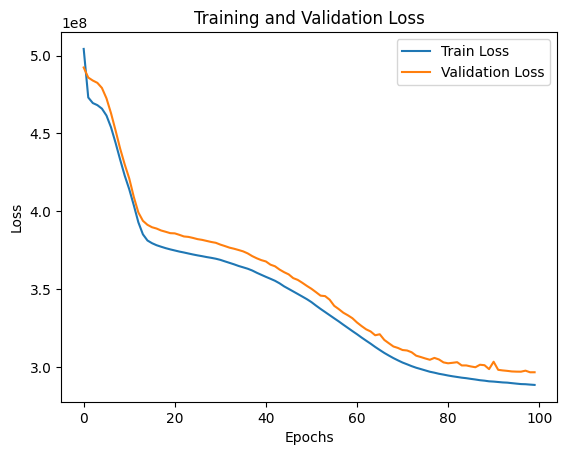

Mean Squared Error on Test Set: 286748018.3677


In [64]:
class TrainingPipeline(Pipeline):
    def fit(self, X, y, X_val=None, y_val=None, **fit_params):
        if 'pytorch_regressor__X_val' in fit_params:
            del fit_params['pytorch_regressor__X_val']
        if 'pytorch_regressor__y_val' in fit_params:
            del fit_params['pytorch_regressor__y_val']
        X_transformed = self.named_steps['preprocessor'].fit_transform(X)
        X_val_transformed = self.named_steps['preprocessor'].transform(X_val) if X_val is not None else None
        self.named_steps['pytorch_regressor'].fit(X_transformed, y, X_val_transformed, y_val, **fit_params)
        return self

training_pipeline = TrainingPipeline([
    ('preprocessor', ct),
    ('pytorch_regressor', PyTorchRegressor(input_dim=19, epochs=100, batch_size=32, learning_rate=0.001))
])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

training_pipeline.fit(X_train, y_train, X_val=X_val, y_val=y_val)
plt.plot(training_pipeline.named_steps['pytorch_regressor'].train_losses, label='Train Loss')
plt.plot(training_pipeline.named_steps['pytorch_regressor'].val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate on test set
predictions = training_pipeline.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse:.4f}')

In [72]:
X_test[:5]

,Store,IsHoliday,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,Year,Week,Type,Size
341903,36,False,13,78.94,3.636,517.28,0.00,0.00,0.92,1767.58,220.428712,6.989,5,2012,2,A,39910
417610,45,False,44,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,5,2012,2,B,118221
899,1,False,7,51.41,2.771,0.00,0.00,0.00,0.00,0.00,211.889674,7.838,11,2010,3,A,151315
410533,44,False,87,66.84,2.875,0.00,0.00,0.00,0.00,0.00,126.145467,7.804,9,2010,2,C,39910
230400,24,False,26,61.05,4.170,10959.96,3425.69,79.48,1682.87,4506.82,137.923067,8.983,4,2012,1,A,203819


In [73]:
y_test[:5]

array([11702.49,  2804.83, 24313.72,   104.88,  7167.06])

In [74]:
training_pipeline.predict(X_test[:5])

array([ 4183.0938,  8610.293 , 24721.43  , 19100.617 , 11649.957 ],
      dtype=float32)